In [1]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Importar el Dataset

dataset = np.load("/Users/diegoalvarez/Documents/Maestria/Python/Proyecto/proyecto_training_data.npy")

In [3]:
SP = dataset[:, 0]
OQ = dataset[:, 1]
FFSF = dataset[:, 2]
TRAG = dataset[:, 3]
YB = dataset[:, 4]
LF = dataset[:, 5]
print(SP)
print(OQ)
print(FFSF)
print(TRAG)
print(YB)
print(LF)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[7. 6. 7. ... 7. 5. 5.]
[ 856. 1262.  920. ... 1188. 1078. 1256.]
[8. 6. 6. ... 9. 5. 6.]
[2003. 1976. 2001. ... 1941. 1950. 1965.]
[65. 80. 68. ... 66. 68. 75.]


In [4]:
dframe = {'SP': (SP),
                 'OQ': (OQ),
                 'FFSF': (FFSF),
                 'TRAG': (TRAG),
                 'YB': (YB),
                 'LF': (LF)
            }
df = pd.DataFrame(dframe)
df     

,SP,OQ,FFSF,TRAG,YB,LF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [5]:
#Revisión de datos NaN
porcentaje_nan_s = (df['SP'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_o = (df['OQ'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_f = (df['FFSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_t = (df['TRAG'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_y = (df['YB'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_l = (df['LF'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_s:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_o:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_f:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_t:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_y:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_l:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 17.74%


LotFrontage: 
Media: 70.04995836802665 
Mediana: 69.0 
Máximo: 313.0 
Mínimo: 21.0



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


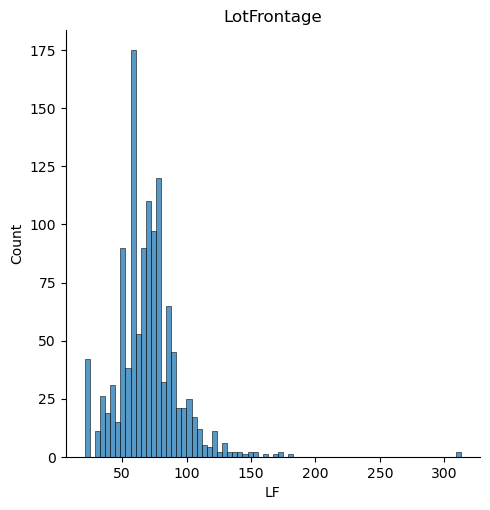

In [9]:
#Análisis de la varible con Nan

LFM = np.nanmean(LF)
LFMD = np.nanmedian(LF)
LFMX = np.nanmax(LF)
LFMN = np.nanmin(LF)
print('LotFrontage:','\n''Media:', LFM,'\n''Mediana:', LFMD, '\n''Máximo:', LFMX,'\n''Mínimo:', LFMN)
print()

gfs = sns.displot(df['LF'])
gfs.set(title='LotFrontage')
plt.show()

In [11]:
#Imputamos los datos NaN

dt_imputados = np.where(np.isnan(dataset), 69, dataset)
print(dt_imputados)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [12]:
tamano_total = len(dt_imputados)
porcentaje_entrenamiento = 0.8

#Calcular el índice para dividir datos
indice_div = int(tamano_total * porcentaje_entrenamiento)

#Dividir los datos en conjunto de entrenamiento y testing
datos_entren = dt_imputados[:indice_div, :]
datos_val = dt_imputados[indice_div:, :]

In [13]:
print("Dimensiones del conjunto de entrenamiento:", datos_entren.shape)
print("Dimensiones del conjunto de validación/pruebas:", datos_val.shape)

Dimensiones del conjunto de entrenamiento: (1168, 6)
Dimensiones del conjunto de validación/pruebas: (292, 6)


In [16]:
SalePrice = datos_entren[:, 0]
OverallQual = datos_entren[:, 1]
FstFlrSF = datos_entren[:, 2]
TotRmsAbvGrd = datos_entren[:, 3]
YearBuilt = datos_entren[:, 4]
LotFrontage = datos_entren[:, 5]
print(SalePrice)
print(OverallQual)
print(FstFlrSF)
print(TotRmsAbvGrd)
print(YearBuilt)
print(LotFrontage)

[208500. 181500. 223500. ... 233170. 245350. 173000.]
[7. 6. 7. ... 7. 8. 6.]
[ 856. 1262.  920. ... 1502. 1694.  959.]
[8. 6. 6. ... 7. 7. 7.]
[2003. 1976. 2001. ... 2009. 2008. 2000.]
[65. 80. 68. ... 79. 64. 58.]


In [17]:
dataframe = {'SalePrice': (SalePrice),
                 'OverallQual': (OverallQual),
                 'FstFlrSF': (FstFlrSF),
                 'TotRmsAbvGrd': (TotRmsAbvGrd),
                 'YearBuilt': (YearBuilt),
                 'LotFrontage': (LotFrontage),
            }
df1 = pd.DataFrame(dataframe)
df1            

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,69.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [25]:
SalePrice_v = datos_val[:, 0]
OverallQual_v = datos_val[:, 1]
FstFlrSF_v = datos_val[:, 2]
TotRmsAbvGrd_v = datos_val[:, 3]
YearBuilt_v = datos_val[:, 4]
LotFrontage_v = datos_val[:, 5]
print(SalePrice)
print(OverallQual)
print(FstFlrSF)
print(TotRmsAbvGrd)
print(YearBuilt)
print(LotFrontage)

[208500. 181500. 223500. ... 233170. 245350. 173000.]
[7. 6. 7. ... 7. 8. 6.]
[ 856. 1262.  920. ... 1502. 1694.  959.]
[8. 6. 6. ... 7. 7. 7.]
[2003. 1976. 2001. ... 2009. 2008. 2000.]
[65. 80. 68. ... 79. 64. 58.]


In [27]:
dataframe_v = {'SalePrice_v': (SalePrice_v),
                 'OverallQual_v': (OverallQual_v),
                 'FstFlrSF_v': (FstFlrSF_v),
                 'TotRmsAbvGrd_v': (TotRmsAbvGrd_v),
                 'YearBuilt_v': (YearBuilt_v),
                 'LotFrontage_v': (LotFrontage_v),
            }
df_v = pd.DataFrame(dataframe_v)
df_v

,SalePrice_v,OverallQual_v,FstFlrSF_v,TotRmsAbvGrd_v,YearBuilt_v,LotFrontage_v
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [19]:
#Análisis Exploratorio de datos

sm = np.mean(SalePrice)
smx = np.max(SalePrice)
smn = np.min(SalePrice)
sp = np.ptp(SalePrice)
sd = np.std(SalePrice)
print('SalePrice:','\n''Media:', sm,'\n''Máximo:', smx,'\n''Mínimo:', smn,'\n''Rango:', sp,'\n''Desviación:', sd)
print('--------------------------')
print()
om = np.mean(OverallQual)
omx = np.max(OverallQual)
omn = np.min(OverallQual)
op = np.ptp(OverallQual)
od = np.std(OverallQual)
print('OverallQual:','\n''Media:', om,'\n''Máximo:', omx,'\n''Mínimo:', omn,'\n''Rango:', op,'\n''Desviación:', od)
print('--------------------------')
print()
fm = np.mean(FstFlrSF)
fmx = np.max(FstFlrSF)
fmn = np.min(FstFlrSF)
fp = np.ptp(FstFlrSF)
fd = np.std(FstFlrSF)
print('FstFlrSF:','\n''Media:', fm,'\n''Máximo:', fmx,'\n''Mínimo:', fmn,'\n''Rango:', fp,'\n''Desviación:', fd)
print('--------------------------')
print()
tm = np.mean(TotRmsAbvGrd)
tmx = np.max(TotRmsAbvGrd)
tmn = np.min(TotRmsAbvGrd)
tp = np.ptp(TotRmsAbvGrd)
td = np.std(TotRmsAbvGrd)
print('TotRmsAbvGrd','\n''Media:', tm,'\n''Máximo:', tmx,'\n''Mínimo:', tmn,'\n''Rango:', tp,'\n''Desviación:', td)
print('--------------------------')
print()
ym = np.mean(YearBuilt)
ymx = np.max(YearBuilt)
ymn = np.min(YearBuilt)
yp = np.ptp(YearBuilt)
yd = np.std(YearBuilt)
print('YearBuilt:','\n''Media:', ym,'\n''Máximo:', ymx,'\n''Mínimo:', ymn,'\n''Rango:', yp,'\n''Desviación:', yd)
print('--------------------------')
print()
lfm = np.mean(LotFrontage)
lfmx = np.max(LotFrontage)
lfmn = np.min(LotFrontage)
lfp = np.ptp(LotFrontage)
lfd = np.std(LotFrontage)
print('LotFrontage:','\n''Media:', lfm,'\n''Máximo:', lfmx,'\n''Mínimo:', lfmn,'\n''Rango:', lfp,'\n''Desviación:', lfd)

SalePrice: 
Media: 180590.27739726027 
Máximo: 755000.0 
Mínimo: 34900.0 
Rango: 720100.0 
Desviación: 78781.95108033362
--------------------------

OverallQual: 
Media: 6.101027397260274 
Máximo: 10.0 
Mínimo: 1.0 
Rango: 9.0 
Desviación: 1.377435193240741
--------------------------

FstFlrSF: 
Media: 1156.3236301369864 
Máximo: 3228.0 
Mínimo: 334.0 
Rango: 2894.0 
Desviación: 373.620331503586
--------------------------

TotRmsAbvGrd 
Media: 6.4854452054794525 
Máximo: 14.0 
Mínimo: 2.0 
Rango: 12.0 
Desviación: 1.6084517167387253
--------------------------

YearBuilt: 
Media: 1971.451198630137 
Máximo: 2010.0 
Mínimo: 1875.0 
Rango: 135.0 
Desviación: 29.93888206867768
--------------------------

LotFrontage: 
Media: 69.77996575342466 
Máximo: 313.0 
Mínimo: 21.0 
Rango: 292.0 
Desviación: 21.29936753833488


/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


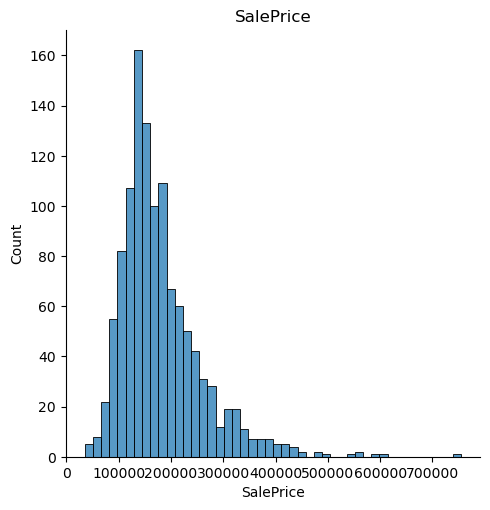

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


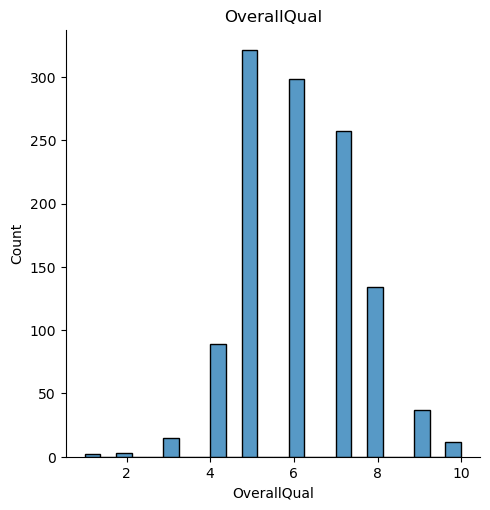

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


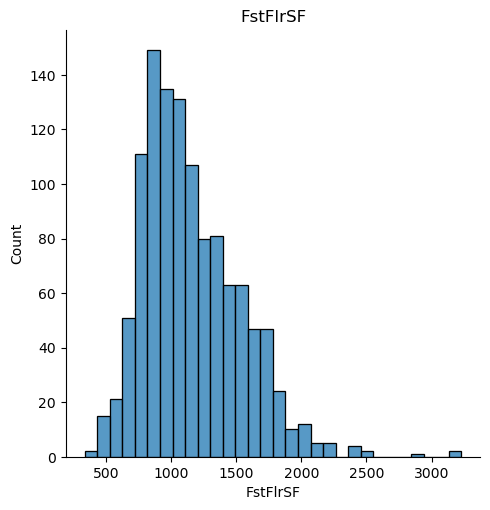

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


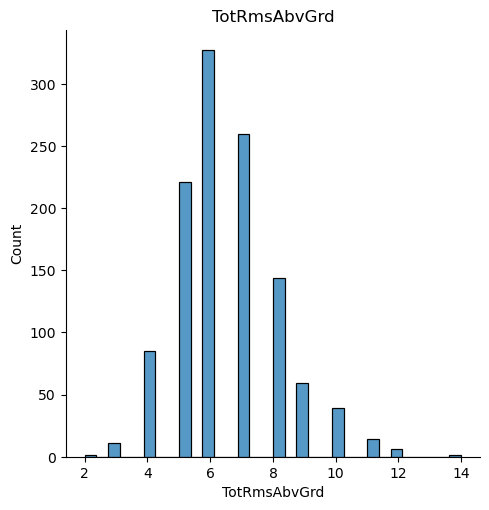

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


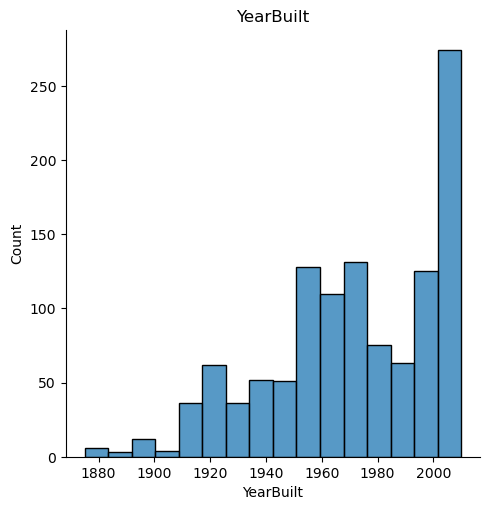

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


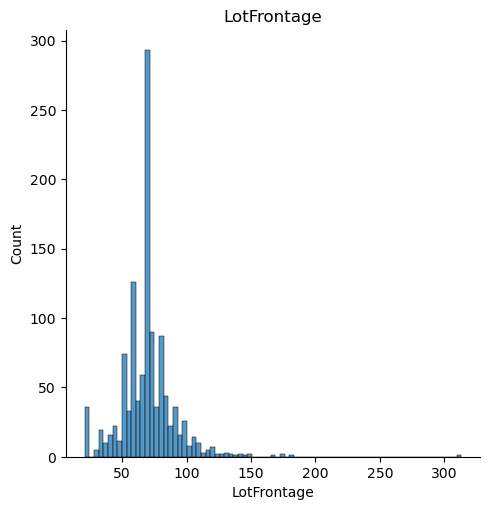

In [21]:
#Histogramas de Variables

gfs = sns.displot(df1['SalePrice'])
gfs.set(title='SalePrice')
plt.show()
print()
gfo = sns.displot(df1['OverallQual'])
gfo.set(title='OverallQual')
plt.show()
print()
gff = sns.displot(df1['FstFlrSF'])
gff.set(title='FstFlrSF')
plt.show()
print()
gft = sns.displot(df1['TotRmsAbvGrd'])
gft.set(title='TotRmsAbvGrd')
plt.show()
print()
gfy = sns.displot(df1['YearBuilt'])
gfy.set(title='YearBuilt')
plt.show()
print()
gfs = sns.displot(df1['LotFrontage'])
gfs.set(title='LotFrontage')
plt.show()

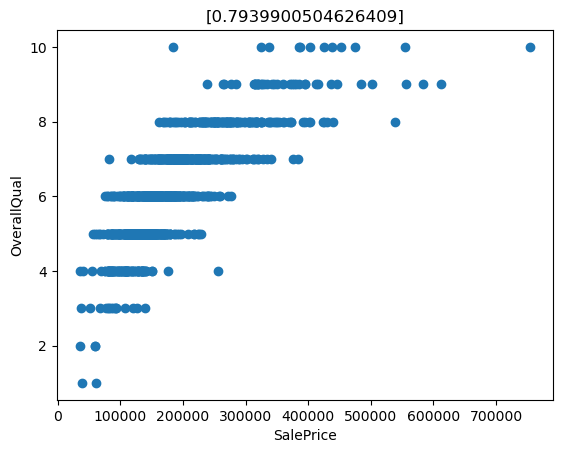

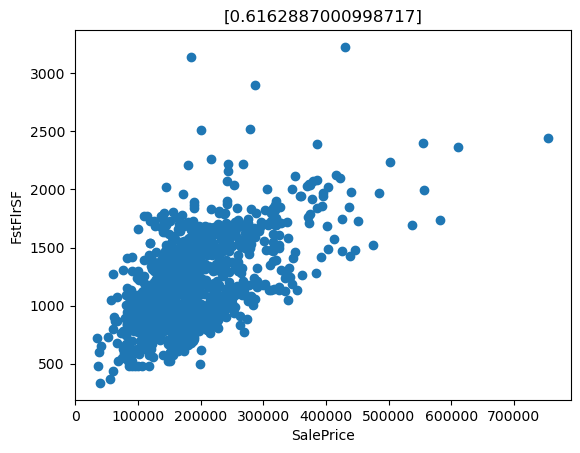

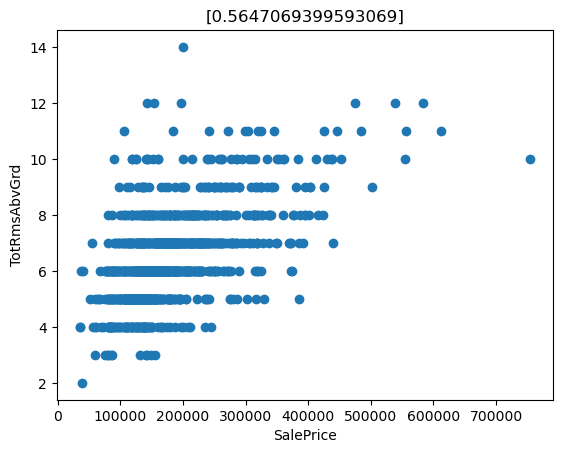

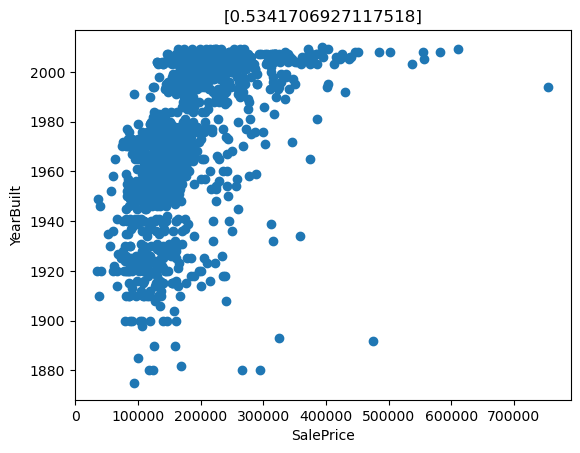

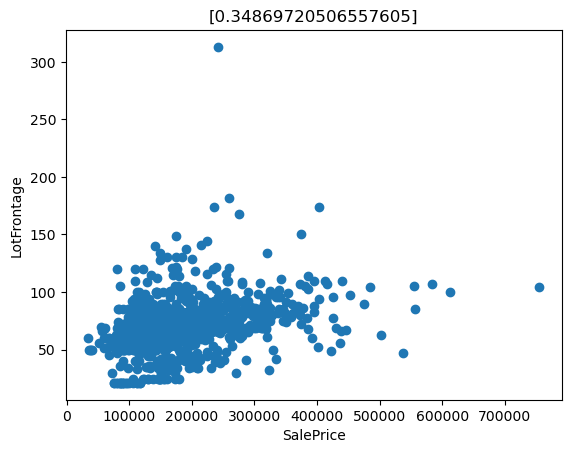

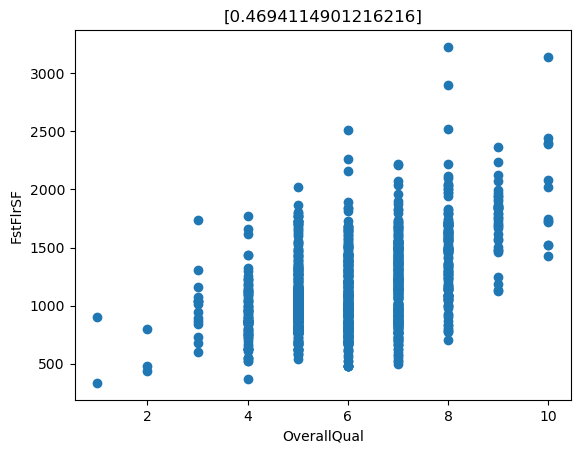

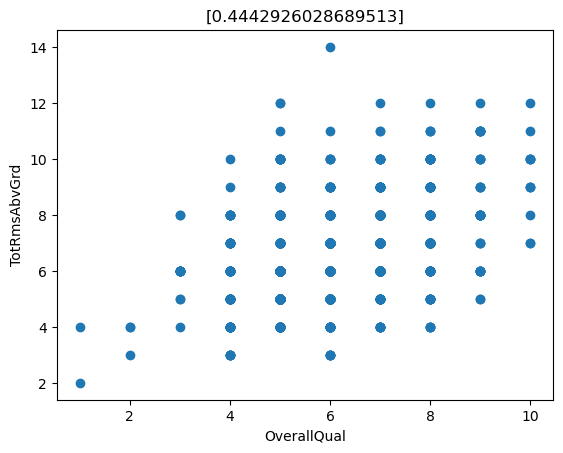

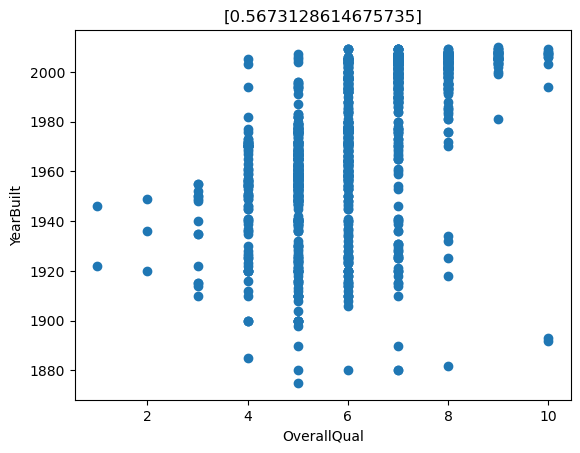

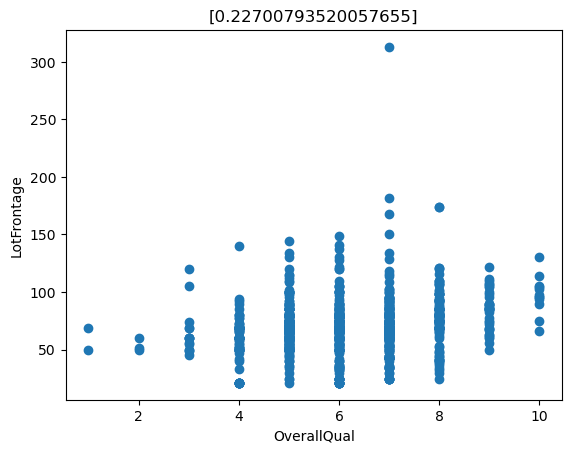

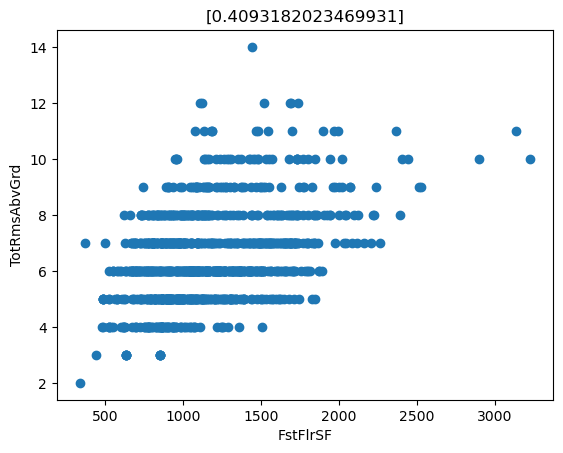

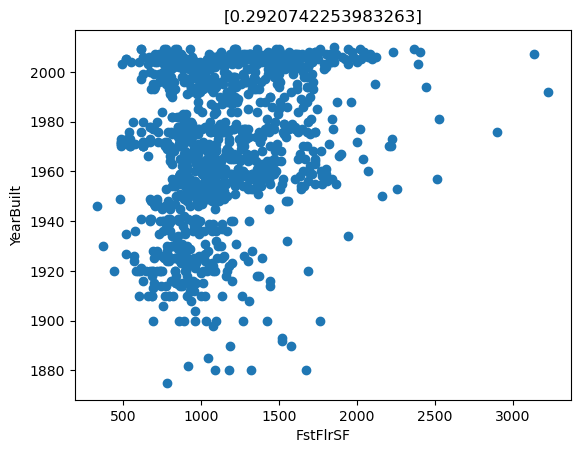

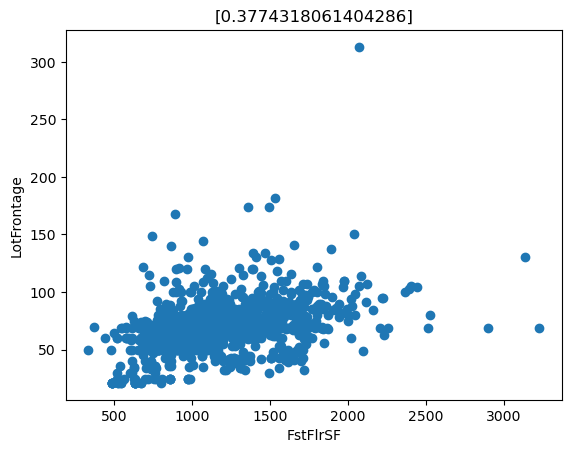

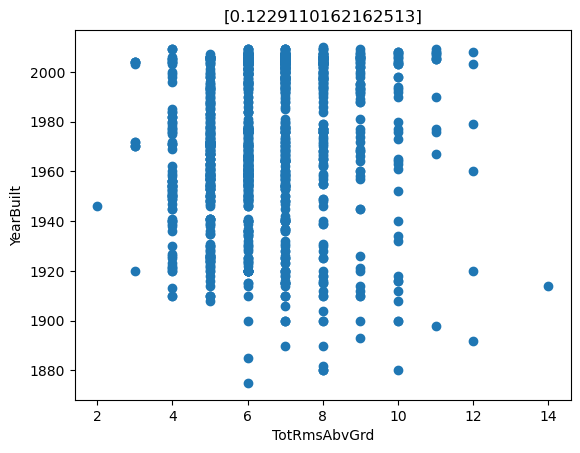

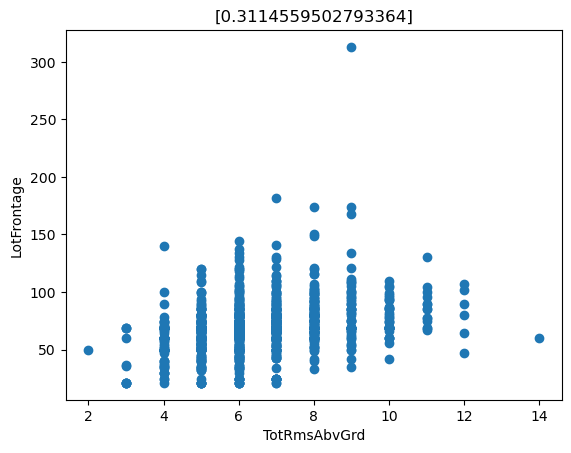

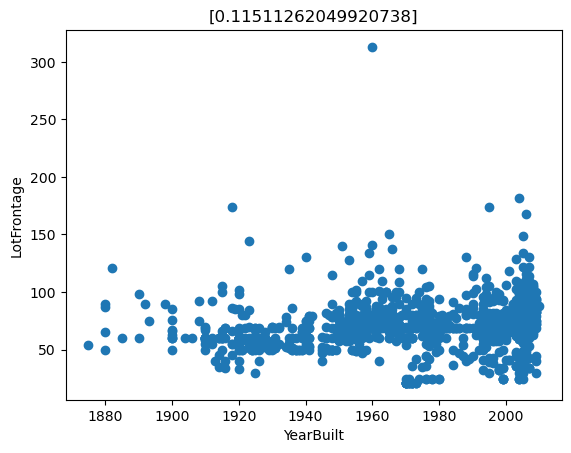

In [22]:
#Correlación

def tr_corr(x, y, x_label, y_label):
    cc = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title([cc])
    plt.show()
    print()

#Correlación para Variables
tr_corr(SalePrice, OverallQual, 'SalePrice', 'OverallQual')
tr_corr(SalePrice, FstFlrSF, 'SalePrice', 'FstFlrSF')
tr_corr(SalePrice, TotRmsAbvGrd, 'SalePrice', 'TotRmsAbvGrd')
tr_corr(SalePrice, YearBuilt, 'SalePrice', 'YearBuilt')
tr_corr(SalePrice, LotFrontage, 'SalePrice', 'LotFrontage')
tr_corr(OverallQual, FstFlrSF, 'OverallQual', 'FstFlrSF')
tr_corr(OverallQual, TotRmsAbvGrd, 'OverallQual', 'TotRmsAbvGrd')
tr_corr(OverallQual, YearBuilt, 'OverallQual', 'YearBuilt')
tr_corr(OverallQual, LotFrontage, 'OverallQual', 'LotFrontage')
tr_corr(FstFlrSF, TotRmsAbvGrd, 'FstFlrSF', 'TotRmsAbvGrd')
tr_corr(FstFlrSF, YearBuilt, 'FstFlrSF', 'YearBuilt')
tr_corr(FstFlrSF, LotFrontage, 'FstFlrSF', 'LotFrontage')
tr_corr(TotRmsAbvGrd, YearBuilt, 'TotRmsAbvGrd', 'YearBuilt')
tr_corr(TotRmsAbvGrd, LotFrontage, 'TotRmsAbvGrd', 'LotFrontage')
tr_corr(YearBuilt, LotFrontage, 'YearBuilt', 'LotFrontage')

In [31]:
class LinearRegressionModel:
    def __init__(self, alpha=0.01):
        self.alpha = alpha  

    def train(self, x, y, epochs, print_error_each):
        self.theta = np.zeros(2)
        errors = []

        
        X = np.column_stack((x, np.ones_like(x)))

        for epoch in range(epochs):
            y_pred = np.dot(X, self.theta)

            error = np.mean((y_pred - y) ** 2)
            errors.append(error)

            if epoch % print_error_each == 0:
                print(f"Iteration {epoch}: Error = {error}")

            gradients = np.dot(X.T, (y_pred - y)) / len(y)

            self.theta -= self.alpha * gradients

        return errors

    def visualize_error(self, errors):
        plt.plot(range(len(errors)), errors)
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        plt.title('Error over iterations')
        plt.show()

    def visualize_model(self, x, y, model_interval=1):
        X = np.column_stack((x, np.ones_like(x)))

        for i in range(0, len(self.theta), model_interval):
            theta_i = self.theta[:i+2]
            y_pred = np.dot(X, theta_i)
            plt.plot(x, y_pred, label=f'Iteration {i}')

        plt.scatter(x, y, color='black', label='Data')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Linear Regression Models')
        plt.legend()
        plt.show()

Iteration 0: Error = 39.08561643835616
Iteration 10: Error = 18.986838396028624
Iteration 20: Error = 10.0880451290388
Iteration 30: Error = 6.148078159808063
Iteration 40: Error = 4.40364616179389
Iteration 50: Error = 3.6312937488245294
Iteration 60: Error = 3.2893324396403565
Iteration 70: Error = 3.137928061254085
Iteration 80: Error = 3.070893326096404
Iteration 90: Error = 3.0412134993575037


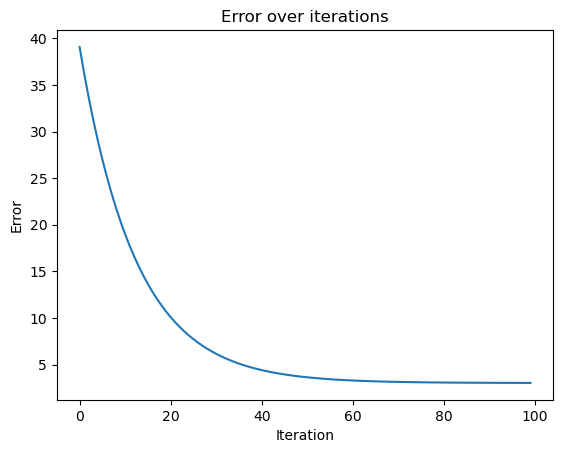

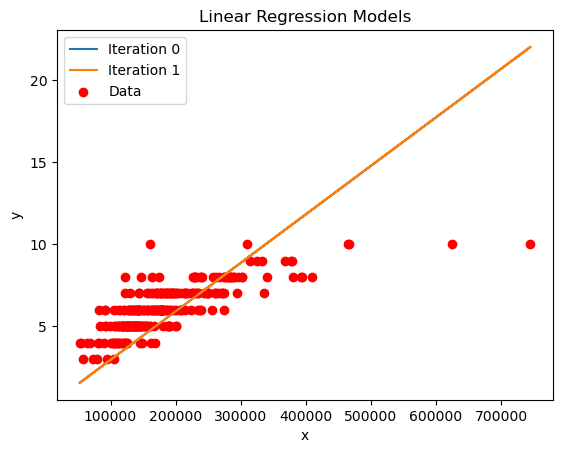

In [46]:
x = SalePrice_v
y = OverallQual_v

model = LinearRegressionModel(alpha=0.000000000001)
errors = model.train(x, y, epochs=100, print_error_each=10)
model.visualize_error(errors)
model.visualize_model(x, y)